# Preparando espécie American Toad

## Limpando dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import math
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split

%matplotlib inline

In [2]:
base = pd.read_csv("americanToadCorre.csv")

In [3]:
base.drop('id',axis=1,inplace=True)
base

,date,lat,lng,tornado,monthtodatesnowfalli,thunder,meantempi,snow,meanvism,meanwdire,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,NaN,0.0,62.0,0.0,NaN,Variable,...,-1.0,48.0,NaN,75.0,NaN,12.0,NaN,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,NaN,0.0,52.0,0.0,27.6,NE,...,38.0,50.0,17.2,98.0,NaN,6.0,NaN,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,NaN,0.0,44.0,0.0,NaN,ENE,...,59.0,36.0,NaN,100.0,NaN,-2.0,NaN,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,NaN,0.0,46.0,0.0,NaN,NW,...,320.0,38.0,NaN,95.0,NaN,5.0,NaN,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,NaN,0.0,40.0,0.0,NaN,South,...,191.0,30.0,NaN,83.0,NaN,0.0,NaN,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,NaN,0.0,73.0,0.0,NaN,SW,...,218.0,66.0,NaN,92.0,NaN,19.0,NaN,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,NaN,0.0,42.0,0.0,NaN,NE,...,39.0,38.0,NaN,95.0,NaN,4.0,NaN,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,SSE,...,162.0,69.0,NaN,100.0,NaN,20.0,NaN,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,NaN,0.0,54.0,0.0,NaN,WNW,...,297.0,43.0,NaN,96.0,NaN,7.0,NaN,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,NaN,0.0,72.0,0.0,NaN,South,...,174.0,59.0,NaN,88.0,NaN,17.0,NaN,81.0,63.0,55.0


In [4]:
#Eliminando pontos coordenados errados
base.drop(3430,inplace=True)
base.drop(3434,inplace=True)
base.drop(3446,inplace=True)
base.drop(3454,inplace=True)
base.drop(3489,inplace=True)
base.drop(3533,inplace=True)
base.drop(3420,inplace=True)

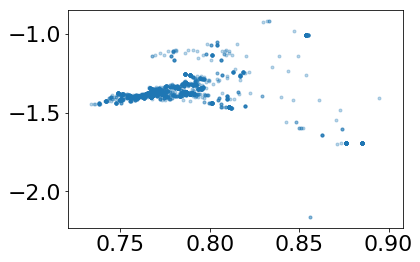

In [85]:
plt.scatter(base["lat"], base["lng"],marker=".", alpha=0.3)

In [6]:
base.shape

(3675, 72)

In [7]:
#Base original
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 72 columns):
date                                  3675 non-null int64
lat                                   3675 non-null float64
lng                                   3675 non-null float64
tornado                               3561 non-null float64
monthtodatesnowfalli                  24 non-null object
thunder                               3561 non-null float64
meantempi                             3502 non-null float64
snow                                  3561 non-null float64
meanvism                              1691 non-null float64
meanwdire                             3430 non-null object
minhumidity                           3484 non-null float64
maxvism                               1691 non-null float64
since1jancoolingdegreedays            39 non-null float64
coolingdegreedays                     3502 non-null float64
maxdewptm                             3484 non-null float64
m

In [8]:
#Descrição da base original
base.describe()

,date,lat,lng,tornado,thunder,meantempi,snow,meanvism,minhumidity,maxvism,...,meanwdird,meandewpti,meanvisi,maxhumidity,snowdepthi,mintempm,since1julsnowfalli,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.0,3561.000000,3502.000000,3561.000000,1691.000000,3484.000000,1691.000000,...,3561.000000,3484.000000,1691.00000,3484.000000,24.0,3503.000000,24.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.0,0.046616,58.595945,0.005336,17.144648,43.931688,20.598108,...,138.276889,48.096728,10.66984,89.204937,0.0,8.805881,36.750000,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.0,0.210845,9.752716,0.072860,5.771699,18.516513,4.592061,...,116.293902,11.177302,3.59805,11.459220,0.0,5.713660,29.078679,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.0,0.000000,-11.000000,0.000000,1.600000,4.000000,3.000000,...,-1.000000,-17.000000,1.00000,24.000000,0.0,-33.000000,0.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.0,0.000000,52.000000,0.000000,13.650000,30.000000,16.000000,...,-1.000000,40.000000,8.50000,84.000000,0.0,5.000000,0.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.0,0.000000,59.000000,0.000000,16.000000,42.500000,24.100000,...,146.000000,49.000000,10.00000,93.000000,0.0,9.000000,58.800000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.0,0.000000,66.000000,0.000000,23.400000,56.000000,24.100000,...,234.000000,56.000000,14.60000,99.000000,0.0,13.000000,58.800000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,0.0,1.000000,85.000000,1.000000,29.200000,100.000000,32.200000,...,360.000000,77.000000,18.10000,100.000000,0.0,25.000000,58.800000,130.000000,88.000000,75.000000


In [9]:
# Elimina as features com poucos valores ou as que são preenchidas com 0
zeros = []
poucos = []
for c in base.columns:
    if (base[c].dtype != 'object' and base[c].mean() == 0):
        base.drop(c,axis=1,inplace=True)
        zeros.append(c)
    elif (base[c].count() < 1700):
        poucos.append(c)
        base.drop(c,axis=1,inplace=True)
zeros

['tornado', 'snowdepthm', 'snowdepthi']

In [10]:
poucos

['monthtodatesnowfalli',
 'meanvism',
 'maxvism',
 'since1jancoolingdegreedays',
 'monthtodatecoolingdegreedays',
 'since1sepheatingdegreedays',
 'since1julsnowfallm',
 'monthtodatesnowfallm',
 'since1sepcoolingdegreedaysnormal',
 'monthtodateheatingdegreedaysnormal',
 'snowfallm',
 'since1julheatingdegreedays',
 'coolingdegreedaysnormal',
 'minvisi',
 'since1sepheatingdegreedaysnormal',
 'since1julheatingdegreedaysnormal',
 'snowfalli',
 'monthtodateheatingdegreedays',
 'monthtodatecoolingdegreedaysnormal',
 'since1sepcoolingdegreedays',
 'minvism',
 'maxvisi',
 'heatingdegreedaysnormal',
 'since1jancoolingdegreedaysnormal',
 'meanvisi',
 'since1julsnowfalli']

In [11]:
base.shape

(3675, 43)

In [12]:
base

,date,lat,lng,thunder,meantempi,snow,meanwdire,minhumidity,coolingdegreedays,maxdewptm,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
0,20150603,49.044380,-123.883420,0.0,62.0,0.0,Variable,50.0,0.0,10.0,...,16.0,30.04,30.01,-1.0,48.0,75.0,12.0,69.0,50.0,46.0
1,20150603,49.044380,-123.883420,0.0,52.0,0.0,NE,46.0,0.0,12.0,...,12.0,30.26,30.03,38.0,50.0,98.0,6.0,62.0,54.0,40.0
2,20080504,46.444667,-63.414966,0.0,44.0,0.0,ENE,36.0,0.0,6.0,...,7.0,30.22,30.07,59.0,36.0,100.0,-2.0,61.0,43.0,28.0
3,20111026,46.241592,-63.544820,0.0,46.0,0.0,NW,51.0,0.0,7.0,...,7.0,29.61,29.49,320.0,38.0,95.0,5.0,49.0,45.0,32.0
4,20170501,46.359260,-63.194550,0.0,40.0,0.0,South,32.0,0.0,4.0,...,4.0,30.27,30.12,191.0,30.0,83.0,0.0,49.0,39.0,21.0
5,20100709,46.438330,-64.127423,0.0,73.0,0.0,SW,52.0,8.0,21.0,...,22.0,30.01,29.89,218.0,66.0,92.0,19.0,80.0,69.0,62.0
6,20110512,46.334425,-63.703709,0.0,42.0,0.0,NE,77.0,0.0,4.0,...,5.0,30.17,30.04,39.0,38.0,95.0,4.0,44.0,39.0,37.0
7,20020830,50.705795,-97.102335,0.0,72.0,0.0,SSE,79.0,6.0,22.0,...,22.0,NaN,NaN,162.0,69.0,100.0,20.0,75.0,71.0,66.0
8,20020914,50.705795,-97.102335,0.0,54.0,0.0,WNW,38.0,0.0,8.0,...,12.0,NaN,NaN,297.0,43.0,96.0,7.0,64.0,46.0,38.0
9,20020917,50.705795,-97.102335,0.0,72.0,0.0,South,41.0,7.0,17.0,...,22.0,NaN,NaN,174.0,59.0,88.0,17.0,81.0,63.0,55.0


In [13]:
#Descrição da base após eliminação de features
base.describe()

,date,lat,lng,thunder,meantempi,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,...,meantempm,maxpressurei,minpressurei,meanwdird,meandewpti,maxhumidity,mintempm,maxtempi,maxdewpti,mindewpti
count,3.675000e+03,3675.000000,3675.000000,3561.000000,3502.000000,3561.000000,3484.000000,3502.000000,3484.000000,3502.000000,...,3502.000000,3327.000000,3327.000000,3561.000000,3484.000000,3484.000000,3503.000000,3503.000000,3484.000000,3484.000000
mean,2.008286e+07,44.922232,-78.370079,0.046616,58.595945,0.005336,43.931688,1.347230,11.887486,7.731868,...,14.739863,30.067238,29.910724,138.276889,48.096728,89.204937,8.805881,69.580645,53.421929,42.293915
std,5.152130e+04,1.592920,6.048941,0.210845,9.752716,0.072860,18.516513,3.015989,6.019060,8.066122,...,5.387896,0.177172,0.192385,116.293902,11.177302,11.459220,5.713660,10.973216,10.832790,12.085173
min,1.997050e+07,42.025100,-123.883420,0.000000,-11.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,...,-24.000000,29.370000,29.050000,-1.000000,-17.000000,24.000000,-33.000000,6.000000,-4.000000,-33.000000
25%,2.004042e+07,43.942236,-79.750000,0.000000,52.000000,0.000000,30.000000,0.000000,8.000000,0.000000,...,12.000000,29.950000,29.790000,-1.000000,40.000000,84.000000,5.000000,63.000000,46.000000,34.000000
50%,2.008070e+07,44.813333,-79.207394,0.000000,59.000000,0.000000,42.500000,0.000000,13.000000,6.000000,...,15.000000,30.070000,29.920000,146.000000,49.000000,93.000000,9.000000,71.000000,55.000000,43.000000
75%,2.012080e+07,45.341407,-77.501954,0.000000,66.000000,0.000000,56.000000,0.000000,16.000000,12.000000,...,18.000000,30.180000,30.040000,234.000000,56.000000,99.000000,13.000000,77.000000,61.000000,51.000000
max,2.018100e+07,51.269538,-52.736600,1.000000,85.000000,1.000000,100.000000,20.000000,31.000000,76.000000,...,30.000000,30.810000,30.460000,360.000000,77.000000,100.000000,25.000000,130.000000,88.000000,75.000000


In [14]:
#Features restantes
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 43 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
meantempi            3502 non-null float64
snow                 3561 non-null float64
meanwdire            3430 non-null object
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3561 non-null object
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
precipsource         3430 non-null object
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null flo

## Verificando se alguma coordenada dá no mar

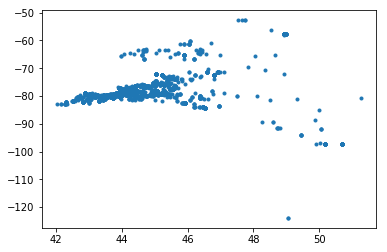

In [15]:
import mplleaflet
plt.scatter(base["lat"], base["lng"], marker=".")

## Convertendo Objects a Int

In [16]:
objects = []
for c in base.columns:
    if (base[c].dtype == 'object'):
        objects.append(c)
objects
#Precipi será eliminada posteriormente, então não será tratada

['meanwdire', 'precipi', 'precipsource', 'precipm']

### precipm 

In [17]:
set(base['precipm'])

{nan,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4',
 'T'}

In [18]:
base['precipm'].replace({'T': 10},inplace=True)

In [19]:
set(base['precipm'])

{nan,
 10,
 '0.0',
 '0.00',
 '0.1',
 '0.2',
 '0.25',
 '0.3',
 '0.4',
 '0.5',
 '0.51',
 '0.6',
 '0.7',
 '0.76',
 '0.8',
 '0.9',
 '1.0',
 '1.02',
 '1.27',
 '1.3',
 '1.5',
 '1.52',
 '1.78',
 '1.8',
 '10.0',
 '10.67',
 '10.7',
 '11.0',
 '11.4',
 '11.7',
 '12.0',
 '12.19',
 '12.70',
 '13.0',
 '13.46',
 '13.72',
 '14.0',
 '14.22',
 '141.99',
 '15.0',
 '15.2',
 '15.5',
 '15.8',
 '16.0',
 '16.3',
 '17.0',
 '18.0',
 '19.0',
 '2.0',
 '2.03',
 '2.29',
 '2.3',
 '2.5',
 '2.8',
 '20.0',
 '20.1',
 '21.0',
 '22.0',
 '23.0',
 '24.38',
 '24.6',
 '25.0',
 '25.40',
 '28.0',
 '28.4',
 '29.0',
 '29.97',
 '3.0',
 '3.3',
 '3.30',
 '3.56',
 '3.6',
 '32.0',
 '35.0',
 '37.0',
 '37.1',
 '39.0',
 '39.88',
 '4.0',
 '4.06',
 '4.1',
 '4.57',
 '4.83',
 '45.97',
 '47.0',
 '5.0',
 '5.1',
 '5.33',
 '5.8',
 '51.0',
 '6.0',
 '6.1',
 '6.6',
 '6.60',
 '66.1',
 '7.0',
 '7.1',
 '7.4',
 '7.62',
 '8.0',
 '8.13',
 '8.4',
 '8.6',
 '8.64',
 '9.0',
 '9.2',
 '9.4'}

In [20]:
base['precipm'] = base['precipm'].astype("float")

### meanwdire

In [21]:
set(base['meanwdire'])

{nan,
 'ENE',
 'ESE',
 'East',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'North',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'South',
 'Variable',
 'WNW',
 'WSW',
 'West'}

In [22]:
#Considerada pouco importante
base.drop('meanwdire',axis=1,inplace=True)

### precipsource

In [23]:
set(base['precipsource']) #eli

{nan, '3Or6HourObs', 'HourlyObs', 'Precip24Synop', 'Precip6GroupSynop'}

In [24]:
#Considerada pouco importante
base.drop('precipsource', axis=1,inplace=True)

## Limpando features duplicadas com medidas diferentes

In [25]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 41 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
meantempi            3502 non-null float64
snow                 3561 non-null float64
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
precipi              3561 non-null object
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
rain                 3561 non-null float64
minwspdm             3397 non-null float64
meanwindspdi         3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
minwspdi             3397 non-null float64
meanpressurei        3327 non-null float64
gdegreedays          3502 non-null float64
mindewptm            3484 non-null f

In [26]:
# Serão eliminadas as features com '*' na célula anterior por ter outra que a represente em ua medida mais comum
base.drop('meantempi',axis=1,inplace=True)
base.drop('mintempi',axis=1,inplace=True)
base.drop('meandewpti',axis=1,inplace=True)
base.drop('maxtempi',axis=1,inplace=True)
base.drop('maxdewpti',axis=1,inplace=True)
base.drop('mindewpti',axis=1,inplace=True)

base.drop('precipi',axis=1,inplace=True)
base.drop('meanwindspdi',axis=1,inplace=True)
base.drop('maxwspdi',axis=1,inplace=True)
base.drop('meanpressurei',axis=1,inplace=True)
base.drop('minwspdi',axis=1,inplace=True)
base.drop('maxpressurei',axis=1,inplace=True)
base.drop('minpressurei',axis=1,inplace=True)

In [27]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 0 to 3681
Data columns (total 28 columns):
date                 3675 non-null int64
lat                  3675 non-null float64
lng                  3675 non-null float64
thunder              3561 non-null float64
snow                 3561 non-null float64
minhumidity          3484 non-null float64
coolingdegreedays    3502 non-null float64
maxdewptm            3484 non-null float64
heatingdegreedays    3502 non-null float64
meanpressurem        3327 non-null float64
rain                 3561 non-null float64
minwspdm             3397 non-null float64
fog                  3561 non-null float64
humidity             3352 non-null float64
gdegreedays          3502 non-null float64
mindewptm            3484 non-null float64
minpressurem         3327 non-null float64
maxtempm             3503 non-null float64
meanwindspdm         3397 non-null float64
maxpressurem         3327 non-null float64
hail                 3561 non-null 

## Convertendo Lontitude e Latitude para Rad

In [28]:
base['lat'] = base['lat']*np.pi/180
base['lng'] = base['lng']*np.pi/180

In [29]:
base.head(10)

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,20150603,0.855986,-2.162174,0.0,0.0,50.0,0.0,10.0,4.0,1016.50,...,1.0,1017.0,0.0,9.0,2.0,0.0,16.0,-1.0,75.0,12.0
1,20150603,0.855986,-2.162174,0.0,0.0,46.0,0.0,12.0,12.0,1018.62,...,5.0,1024.0,0.0,10.0,15.0,0.0,12.0,38.0,98.0,6.0
2,20080504,0.810612,-1.106800,0.0,0.0,36.0,0.0,6.0,21.0,1020.73,...,5.0,1023.0,0.0,2.0,15.0,0.2,7.0,59.0,100.0,-2.0
3,20111026,0.807068,-1.109066,0.0,0.0,51.0,0.0,7.0,20.0,1000.00,...,22.0,1002.0,0.0,3.0,37.0,2.0,7.0,320.0,95.0,5.0
4,20170501,0.809122,-1.102953,0.0,0.0,32.0,0.0,4.0,24.0,1022.96,...,10.0,1025.0,0.0,-1.0,17.0,4.0,4.0,191.0,83.0,0.0
5,20100709,0.810502,-1.119235,0.0,0.0,52.0,8.0,21.0,0.0,1014.27,...,24.0,1016.0,0.0,19.0,37.0,0.0,22.0,218.0,92.0,19.0
6,20110512,0.808688,-1.111839,0.0,0.0,77.0,0.0,4.0,23.0,1019.33,...,31.0,1021.0,0.0,3.0,43.0,0.0,5.0,39.0,95.0,4.0
7,20020830,0.884983,-1.694755,0.0,0.0,79.0,6.0,22.0,0.0,NaN,...,16.0,NaN,0.0,20.0,30.0,0.0,22.0,162.0,100.0,20.0
8,20020914,0.884983,-1.694755,0.0,0.0,38.0,0.0,8.0,10.0,NaN,...,15.0,NaN,0.0,6.0,26.0,0.0,12.0,297.0,96.0,7.0
9,20020917,0.884983,-1.694755,0.0,0.0,41.0,7.0,17.0,0.0,NaN,...,23.0,NaN,0.0,15.0,35.0,0.0,22.0,174.0,88.0,17.0


## Preenchimento de NaN

In [30]:
co = base.columns
co = co.delete(0)
co = co.delete(0)
co = co.delete(0)
co

Index([u'thunder', u'snow', u'minhumidity', u'coolingdegreedays', u'maxdewptm',
       u'heatingdegreedays', u'meanpressurem', u'rain', u'minwspdm', u'fog',
       u'humidity', u'gdegreedays', u'mindewptm', u'minpressurem', u'maxtempm',
       u'meanwindspdm', u'maxpressurem', u'hail', u'meandewptm', u'maxwspdm',
       u'precipm', u'meantempm', u'meanwdird', u'maxhumidity', u'mintempm'],
      dtype='object')

In [31]:
size = len(base)
size

3675

In [32]:
t = base.copy()

In [48]:
# Escolhendo o melhor número de vizinhos para cada feature
# KNeighborsRegressor(n_neighbors=k) Instancia o modelo e diz o número de vizinhos (k)
# OBS.: evite número par para evitar empates e também números grandes para usar uma vizinhança mais próximas
base = t.copy()
ks = {}
scores_std = []
scrs = []
for c in co:
    if (base[c].count() < size):
        x = base.dropna(subset=[c])
        print("Feature:",c)
        scores_mean = {}
        for k in range(1,30):
            cv = ShuffleSplit(n_splits=10, test_size=0.3)
            kviz = KNeighborsRegressor(n_neighbors=k)
            scores = cross_val_score(kviz, x.loc[:,['date','lat','lng']],
                                     x[c], cv=cv, n_jobs=4, scoring = 'neg_mean_absolute_error')
            scores_mean[scores.mean()] = k
            print('viz: ',k, "mean: {:.3f} (std: {:.4f})".format(scores.mean(), scores.std(),))
            if(c=='snow'):
                scrs.append(scores.mean())
                scores_std.append(scores.std())
        #Escolhe o k que maximiza a média do score negativado
        ks[c] = scores_mean[np.max(scores_mean.keys())]
        print("melhor k:",ks[c])

('Feature:', 'thunder')
('viz: ', 1, 'mean: -0.065 (std: 0.0046)')
('viz: ', 2, 'mean: -0.066 (std: 0.0045)')
('viz: ', 3, 'mean: -0.072 (std: 0.0034)')
('viz: ', 4, 'mean: -0.076 (std: 0.0017)')
('viz: ', 5, 'mean: -0.079 (std: 0.0039)')
('viz: ', 6, 'mean: -0.078 (std: 0.0021)')
('viz: ', 7, 'mean: -0.080 (std: 0.0032)')
('viz: ', 8, 'mean: -0.079 (std: 0.0034)')
('viz: ', 9, 'mean: -0.080 (std: 0.0058)')
('viz: ', 10, 'mean: -0.082 (std: 0.0036)')
('viz: ', 11, 'mean: -0.082 (std: 0.0029)')
('viz: ', 12, 'mean: -0.084 (std: 0.0029)')
('viz: ', 13, 'mean: -0.084 (std: 0.0025)')
('viz: ', 14, 'mean: -0.084 (std: 0.0034)')
('viz: ', 15, 'mean: -0.084 (std: 0.0033)')
('viz: ', 16, 'mean: -0.086 (std: 0.0030)')
('viz: ', 17, 'mean: -0.085 (std: 0.0038)')
('viz: ', 18, 'mean: -0.085 (std: 0.0035)')
('viz: ', 19, 'mean: -0.086 (std: 0.0048)')
('viz: ', 20, 'mean: -0.085 (std: 0.0035)')
('viz: ', 21, 'mean: -0.086 (std: 0.0046)')
('viz: ', 22, 'mean: -0.084 (std: 0.0038)')
('viz: ', 23, 'me

('viz: ', 8, 'mean: -3.765 (std: 0.0778)')
('viz: ', 9, 'mean: -3.870 (std: 0.0893)')
('viz: ', 10, 'mean: -3.953 (std: 0.0847)')
('viz: ', 11, 'mean: -4.018 (std: 0.0904)')
('viz: ', 12, 'mean: -4.065 (std: 0.0682)')
('viz: ', 13, 'mean: -4.189 (std: 0.0998)')
('viz: ', 14, 'mean: -4.172 (std: 0.0747)')
('viz: ', 15, 'mean: -4.180 (std: 0.1108)')
('viz: ', 16, 'mean: -4.249 (std: 0.1017)')
('viz: ', 17, 'mean: -4.346 (std: 0.0637)')
('viz: ', 18, 'mean: -4.297 (std: 0.0753)')
('viz: ', 19, 'mean: -4.322 (std: 0.0938)')
('viz: ', 20, 'mean: -4.340 (std: 0.1031)')
('viz: ', 21, 'mean: -4.363 (std: 0.0840)')
('viz: ', 22, 'mean: -4.422 (std: 0.0773)')
('viz: ', 23, 'mean: -4.411 (std: 0.1016)')
('viz: ', 24, 'mean: -4.480 (std: 0.1120)')
('viz: ', 25, 'mean: -4.510 (std: 0.0838)')
('viz: ', 26, 'mean: -4.546 (std: 0.0595)')
('viz: ', 27, 'mean: -4.540 (std: 0.0652)')
('viz: ', 28, 'mean: -4.626 (std: 0.0601)')
('viz: ', 29, 'mean: -4.540 (std: 0.0994)')
('melhor k:', 1)
('Feature:', 'rai

('viz: ', 16, 'mean: -3.672 (std: 0.0630)')
('viz: ', 17, 'mean: -3.714 (std: 0.0668)')
('viz: ', 18, 'mean: -3.777 (std: 0.0640)')
('viz: ', 19, 'mean: -3.783 (std: 0.0929)')
('viz: ', 20, 'mean: -3.820 (std: 0.0639)')
('viz: ', 21, 'mean: -3.830 (std: 0.1062)')
('viz: ', 22, 'mean: -3.903 (std: 0.1044)')
('viz: ', 23, 'mean: -3.967 (std: 0.0781)')
('viz: ', 24, 'mean: -3.958 (std: 0.0634)')
('viz: ', 25, 'mean: -3.996 (std: 0.0765)')
('viz: ', 26, 'mean: -4.039 (std: 0.0571)')
('viz: ', 27, 'mean: -4.047 (std: 0.0827)')
('viz: ', 28, 'mean: -4.059 (std: 0.0860)')
('viz: ', 29, 'mean: -4.090 (std: 0.0547)')
('melhor k:', 2)
('Feature:', 'minpressurem')
('viz: ', 1, 'mean: -3.180 (std: 0.0616)')
('viz: ', 2, 'mean: -3.311 (std: 0.1130)')
('viz: ', 3, 'mean: -3.471 (std: 0.0928)')
('viz: ', 4, 'mean: -3.572 (std: 0.1071)')
('viz: ', 5, 'mean: -3.752 (std: 0.0835)')
('viz: ', 6, 'mean: -3.906 (std: 0.1274)')
('viz: ', 7, 'mean: -4.000 (std: 0.1456)')
('viz: ', 8, 'mean: -4.082 (std: 0.10

('viz: ', 24, 'mean: -3.698 (std: 0.0732)')
('viz: ', 25, 'mean: -3.691 (std: 0.0903)')
('viz: ', 26, 'mean: -3.722 (std: 0.0775)')
('viz: ', 27, 'mean: -3.718 (std: 0.1039)')
('viz: ', 28, 'mean: -3.750 (std: 0.0880)')
('viz: ', 29, 'mean: -3.792 (std: 0.1055)')
('melhor k:', 1)
('Feature:', 'maxwspdm')
('viz: ', 1, 'mean: -7.261 (std: 0.2781)')
('viz: ', 2, 'mean: -7.008 (std: 0.1432)')
('viz: ', 3, 'mean: -6.625 (std: 0.1321)')
('viz: ', 4, 'mean: -6.683 (std: 0.2013)')
('viz: ', 5, 'mean: -6.549 (std: 0.1324)')
('viz: ', 6, 'mean: -6.471 (std: 0.0917)')
('viz: ', 7, 'mean: -6.485 (std: 0.1904)')
('viz: ', 8, 'mean: -6.437 (std: 0.1738)')
('viz: ', 9, 'mean: -6.459 (std: 0.1160)')
('viz: ', 10, 'mean: -6.464 (std: 0.1509)')
('viz: ', 11, 'mean: -6.486 (std: 0.2039)')
('viz: ', 12, 'mean: -6.464 (std: 0.1876)')
('viz: ', 13, 'mean: -6.565 (std: 0.1600)')
('viz: ', 14, 'mean: -6.441 (std: 0.1240)')
('viz: ', 15, 'mean: -6.454 (std: 0.1620)')
('viz: ', 16, 'mean: -6.535 (std: 0.1155)')

In [49]:
# Ks escolhidos que minimizam o erro
ks

{'coolingdegreedays': 1,
 'fog': 1,
 'gdegreedays': 1,
 'hail': 2,
 'heatingdegreedays': 1,
 'humidity': 3,
 'maxdewptm': 1,
 'maxhumidity': 6,
 'maxpressurem': 1,
 'maxtempm': 2,
 'maxwspdm': 19,
 'meandewptm': 1,
 'meanpressurem': 1,
 'meantempm': 3,
 'meanwdird': 3,
 'meanwindspdm': 10,
 'mindewptm': 2,
 'minhumidity': 2,
 'minpressurem': 1,
 'mintempm': 2,
 'minwspdm': 4,
 'precipm': 2,
 'rain': 1,
 'snow': 3,
 'thunder': 1}

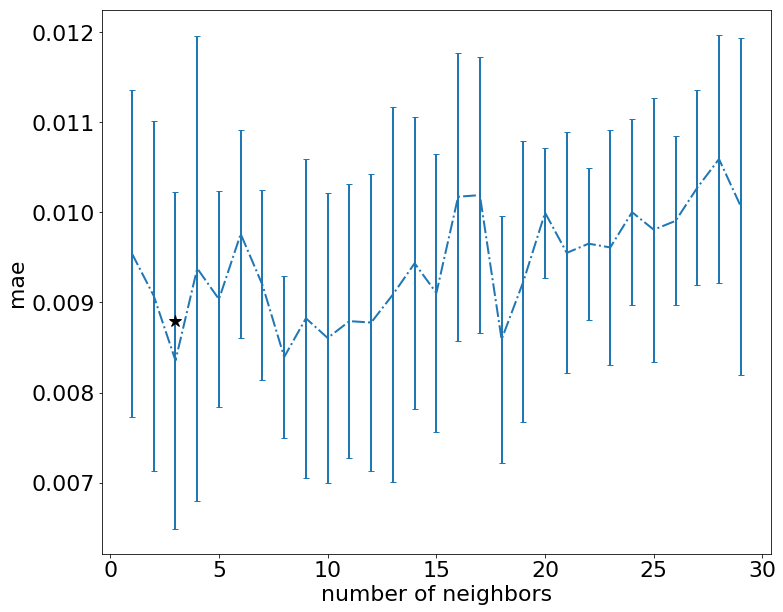

In [87]:
# Plota gráfico mostrando a variação do k para '' em função do MAE
# snow
plt.figure(figsize=(12,10))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)
plt.errorbar(range(1,30), np.abs(scrs), yerr=scores_std, fmt = '-.', capsize=3,linewidth=2)
plt.plot(3,np.abs(scrs[10]),'k*', markersize=12)
plt.ylabel('mae') #mean_absolute_error
plt.xlabel('number of neighbors')
#plt.savefig('./figures/randomForest_n_estimators_' + str(lag) + '.svg', format="svg", bbox_inches='tight')
plt.savefig('n_vizinhos_snow.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [51]:
# Preenchendo NaN com k-viz usando o número de vizinhos antes escolhido a cada feature
for c in co:
    if (base[c].count() < size):
        kviz = KNeighborsRegressor(n_neighbors=ks[c])
        x = base.dropna(subset=[c])
        kviz.fit(x.loc[:,['date','lat','lng']],x[c])
        teste = base.loc[base[c].isnull()]
        teste[c] = kviz.predict(teste.loc[:,['date','lat','lng']])
        base = pd.concat([x,teste])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
base.describe()

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
count,3.675000e+03,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,...,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,2.008286e+07,0.784041,-1.367816,0.045986,0.005261,44.005850,1.371973,11.908027,7.739048,1015.475856,...,8.490884,1017.999456,0.001088,8.947211,20.597050,1.033586,14.733152,137.786122,89.271156,8.828027
std,5.152130e+04,0.027802,0.105574,0.209484,0.071931,18.277395,3.087039,6.026545,8.027693,6.206451,...,4.959006,6.027292,0.032978,6.216248,9.888851,4.429408,5.365148,115.489882,11.226351,5.668182
min,1.997050e+07,0.733476,-2.162174,0.000000,0.000000,4.000000,0.000000,-20.000000,0.000000,992.450000,...,0.000000,994.000000,0.000000,-27.000000,0.000000,0.000000,-24.000000,-1.000000,24.000000,-33.000000
25%,2.004042e+07,0.766937,-1.391900,0.000000,0.000000,30.000000,0.000000,8.000000,0.000000,1011.445000,...,5.000000,1014.000000,0.000000,5.000000,15.000000,0.000000,11.000000,-1.000000,84.250000,5.000000
50%,2.008070e+07,0.782140,-1.382430,0.000000,0.000000,43.000000,0.000000,13.000000,6.000000,1015.810000,...,8.000000,1018.000000,0.000000,10.000000,19.947368,0.000000,15.000000,145.000000,93.000000,9.000000
75%,2.012080e+07,0.791357,-1.352664,0.000000,0.000000,56.000000,0.000000,16.000000,12.000000,1019.675000,...,11.000000,1022.000000,0.000000,14.000000,26.000000,0.000000,18.000000,233.000000,98.000000,13.000000
max,2.018100e+07,0.894822,-0.920427,1.000000,1.000000,100.000000,20.000000,31.000000,76.000000,1040.660000,...,105.000000,1043.000000,1.000000,25.000000,200.000000,141.990000,30.000000,360.000000,100.000000,25.000000


## Criando base usando as estações do ano 

In [53]:
primavera = base.loc[(base['date']%1000<=620) & (base['date']%1000>=320)]
primavera['date'] = "0" #Primavera
verao = base.loc[(base['date']%1000<=921) & (base['date']%1000>=621)]
verao['date'] = "1" #Verão
outono = base.loc[(base['date']%1000<=1220) & (base['date']%1000>=922)]
outono['date'] = "2" #Outono
inverno = base.loc[(base['date']%1000<=1221) & (base['date']%1000>=319)]
inverno['date'] = "3" #Inverno
frames = [primavera,verao,outono,inverno]
dadosEstacao = pd.concat(frames)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [54]:
dadosEstacao

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,0,0.855986,-2.162174,0.0,0.000000,50.0,0.0,10.0,4.0,1016.50,...,1.0,1017.0,0.0,9.0,2.000000,0.00,16.000000,-1.000000,75.000000,12.0
1,0,0.855986,-2.162174,0.0,0.000000,46.0,0.0,12.0,12.0,1018.62,...,5.0,1024.0,0.0,10.0,15.000000,0.00,12.000000,38.000000,98.000000,6.0
2,0,0.810612,-1.106800,0.0,0.000000,36.0,0.0,6.0,21.0,1020.73,...,5.0,1023.0,0.0,2.0,15.000000,0.20,7.000000,59.000000,100.000000,-2.0
4,0,0.809122,-1.102953,0.0,0.000000,32.0,0.0,4.0,24.0,1022.96,...,10.0,1025.0,0.0,-1.0,17.000000,4.00,4.000000,191.000000,83.000000,0.0
6,0,0.808688,-1.111839,0.0,0.000000,77.0,0.0,4.0,23.0,1019.33,...,31.0,1021.0,0.0,3.0,43.000000,0.00,5.000000,39.000000,95.000000,4.0
35,0,0.875937,-1.695151,0.0,0.000000,9.0,0.0,-4.0,22.0,1010.00,...,19.0,1013.0,0.0,-7.0,48.000000,0.00,6.000000,-1.000000,67.000000,0.0
36,0,0.875937,-1.695151,0.0,0.000000,7.0,0.0,-7.0,18.0,1017.50,...,12.0,1020.0,0.0,-9.0,28.000000,0.00,8.000000,-1.000000,39.000000,0.0
37,0,0.875937,-1.695151,0.0,0.000000,9.0,0.0,-1.0,3.0,1010.75,...,28.0,1012.0,0.0,-3.0,56.000000,0.00,16.000000,-1.000000,29.000000,11.0
38,0,0.875937,-1.695151,0.0,0.000000,14.0,0.0,0.0,18.0,1016.75,...,11.0,1019.0,0.0,-2.0,18.000000,0.00,8.000000,-1.000000,53.000000,4.0
39,0,0.875937,-1.695151,0.0,0.000000,16.0,0.0,1.0,13.0,1018.25,...,18.0,1021.0,0.0,-2.0,43.000000,0.00,11.000000,-1.000000,38.000000,4.0


## Atualizando a Data para somente o mês

In [55]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,20150603,0.855986,-2.162174,0.0,0.000000,50.0,0.0,10.0,4.0,1016.50,...,1.0,1017.0,0.0,9.0,2.000000,0.00,16.000000,-1.000000,75.000000,12.0
1,20150603,0.855986,-2.162174,0.0,0.000000,46.0,0.0,12.0,12.0,1018.62,...,5.0,1024.0,0.0,10.0,15.000000,0.00,12.000000,38.000000,98.000000,6.0
2,20080504,0.810612,-1.106800,0.0,0.000000,36.0,0.0,6.0,21.0,1020.73,...,5.0,1023.0,0.0,2.0,15.000000,0.20,7.000000,59.000000,100.000000,-2.0
3,20111026,0.807068,-1.109066,0.0,0.000000,51.0,0.0,7.0,20.0,1000.00,...,22.0,1002.0,0.0,3.0,37.000000,2.00,7.000000,320.000000,95.000000,5.0
4,20170501,0.809122,-1.102953,0.0,0.000000,32.0,0.0,4.0,24.0,1022.96,...,10.0,1025.0,0.0,-1.0,17.000000,4.00,4.000000,191.000000,83.000000,0.0
5,20100709,0.810502,-1.119235,0.0,0.000000,52.0,8.0,21.0,0.0,1014.27,...,24.0,1016.0,0.0,19.0,37.000000,0.00,22.000000,218.000000,92.000000,19.0
6,20110512,0.808688,-1.111839,0.0,0.000000,77.0,0.0,4.0,23.0,1019.33,...,31.0,1021.0,0.0,3.0,43.000000,0.00,5.000000,39.000000,95.000000,4.0
35,20150413,0.875937,-1.695151,0.0,0.000000,9.0,0.0,-4.0,22.0,1010.00,...,19.0,1013.0,0.0,-7.0,48.000000,0.00,6.000000,-1.000000,67.000000,0.0
36,20150414,0.875937,-1.695151,0.0,0.000000,7.0,0.0,-7.0,18.0,1017.50,...,12.0,1020.0,0.0,-9.0,28.000000,0.00,8.000000,-1.000000,39.000000,0.0
37,20150415,0.875937,-1.695151,0.0,0.000000,9.0,0.0,-1.0,3.0,1010.75,...,28.0,1012.0,0.0,-3.0,56.000000,0.00,16.000000,-1.000000,29.000000,11.0


In [56]:
base['date'] = (base['date']//100)%100

In [57]:
base

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,6,0.855986,-2.162174,0.0,0.000000,50.0,0.0,10.0,4.0,1016.50,...,1.0,1017.0,0.0,9.0,2.000000,0.00,16.000000,-1.000000,75.000000,12.0
1,6,0.855986,-2.162174,0.0,0.000000,46.0,0.0,12.0,12.0,1018.62,...,5.0,1024.0,0.0,10.0,15.000000,0.00,12.000000,38.000000,98.000000,6.0
2,5,0.810612,-1.106800,0.0,0.000000,36.0,0.0,6.0,21.0,1020.73,...,5.0,1023.0,0.0,2.0,15.000000,0.20,7.000000,59.000000,100.000000,-2.0
3,10,0.807068,-1.109066,0.0,0.000000,51.0,0.0,7.0,20.0,1000.00,...,22.0,1002.0,0.0,3.0,37.000000,2.00,7.000000,320.000000,95.000000,5.0
4,5,0.809122,-1.102953,0.0,0.000000,32.0,0.0,4.0,24.0,1022.96,...,10.0,1025.0,0.0,-1.0,17.000000,4.00,4.000000,191.000000,83.000000,0.0
5,7,0.810502,-1.119235,0.0,0.000000,52.0,8.0,21.0,0.0,1014.27,...,24.0,1016.0,0.0,19.0,37.000000,0.00,22.000000,218.000000,92.000000,19.0
6,5,0.808688,-1.111839,0.0,0.000000,77.0,0.0,4.0,23.0,1019.33,...,31.0,1021.0,0.0,3.0,43.000000,0.00,5.000000,39.000000,95.000000,4.0
35,4,0.875937,-1.695151,0.0,0.000000,9.0,0.0,-4.0,22.0,1010.00,...,19.0,1013.0,0.0,-7.0,48.000000,0.00,6.000000,-1.000000,67.000000,0.0
36,4,0.875937,-1.695151,0.0,0.000000,7.0,0.0,-7.0,18.0,1017.50,...,12.0,1020.0,0.0,-9.0,28.000000,0.00,8.000000,-1.000000,39.000000,0.0
37,4,0.875937,-1.695151,0.0,0.000000,9.0,0.0,-1.0,3.0,1010.75,...,28.0,1012.0,0.0,-3.0,56.000000,0.00,16.000000,-1.000000,29.000000,11.0


In [58]:
base.shape

(3675, 28)

## Padronizando com o RobustScaler + MinMaxScaler

In [80]:
# O robust é bom por não ser enganado pelos outliers na média e variância
padraoMes = RobustScaler().fit_transform(base)
padraoMes = MinMaxScaler().fit_transform(padraoMes)
padraoEstacao = RobustScaler().fit_transform(dadosEstacao)
padraoEstacao = MinMaxScaler().fit_transform(dadosEstacao)

In [81]:
padraoMes

array([[0.45454545, 0.75929766, 0.        , ..., 0.        , 0.67105263,
        0.77586207],
       [0.45454545, 0.75929766, 0.        , ..., 0.10803324, 0.97368421,
        0.67241379],
       [0.36363636, 0.47807851, 0.84991085, ..., 0.16620499, 1.        ,
        0.53448276],
       ...,
       [0.27272727, 0.74731544, 0.92935875, ..., 0.        , 0.82675439,
        0.63793103],
       [0.45454545, 0.74731544, 0.92935875, ..., 0.22068329, 0.81578947,
        0.68965517],
       [0.45454545, 0.74731544, 0.92935875, ..., 0.        , 0.81578947,
        0.68965517]])

In [82]:
df_padraoMes = pd.DataFrame(padraoMes, columns=base.columns)
df_padraoEstacao = pd.DataFrame(padraoEstacao, columns=dadosEstacao.columns)

In [83]:
df_padraoMes

,date,lat,lng,thunder,snow,minhumidity,coolingdegreedays,maxdewptm,heatingdegreedays,meanpressurem,...,meanwindspdm,maxpressurem,hail,meandewptm,maxwspdm,precipm,meantempm,meanwdird,maxhumidity,mintempm
0,0.454545,0.759298,0.000000,0.0,0.000000,0.479167,0.00,0.588235,0.052632,0.498859,...,0.009524,0.469388,0.0,0.692308,0.010000,0.000000,0.740741,0.000000,0.671053,0.775862
1,0.454545,0.759298,0.000000,0.0,0.000000,0.437500,0.00,0.627451,0.157895,0.542833,...,0.047619,0.612245,0.0,0.711538,0.075000,0.000000,0.666667,0.108033,0.973684,0.672414
2,0.363636,0.478079,0.849911,0.0,0.000000,0.333333,0.00,0.509804,0.276316,0.586600,...,0.047619,0.591837,0.0,0.557692,0.075000,0.001409,0.574074,0.166205,1.000000,0.534483
3,0.818182,0.456111,0.848086,0.0,0.000000,0.489583,0.00,0.529412,0.263158,0.156607,...,0.209524,0.163265,0.0,0.576923,0.185000,0.014085,0.574074,0.889197,0.934211,0.655172
4,0.363636,0.468840,0.853009,0.0,0.000000,0.291667,0.00,0.470588,0.315789,0.632856,...,0.095238,0.632653,0.0,0.500000,0.085000,0.028171,0.518519,0.531856,0.776316,0.568966
5,0.545455,0.477393,0.839897,0.0,0.000000,0.500000,0.40,0.803922,0.000000,0.452603,...,0.228571,0.448980,0.0,0.884615,0.185000,0.000000,0.851852,0.606648,0.894737,0.896552
6,0.363636,0.466153,0.845852,0.0,0.000000,0.760417,0.00,0.470588,0.302632,0.557561,...,0.295238,0.551020,0.0,0.576923,0.215000,0.000000,0.537037,0.110803,0.934211,0.637931
7,0.272727,0.882953,0.376101,0.0,0.000000,0.052083,0.00,0.313725,0.289474,0.364032,...,0.180952,0.387755,0.0,0.384615,0.240000,0.000000,0.555556,0.000000,0.565789,0.568966
8,0.272727,0.882953,0.376101,0.0,0.000000,0.031250,0.00,0.254902,0.236842,0.519602,...,0.114286,0.530612,0.0,0.346154,0.140000,0.000000,0.592593,0.000000,0.197368,0.568966
9,0.272727,0.882953,0.376101,0.0,0.000000,0.052083,0.00,0.372549,0.039474,0.379589,...,0.266667,0.367347,0.0,0.461538,0.280000,0.000000,0.740741,0.000000,0.065789,0.758621


In [79]:
df_padraoMes.to_csv("americanToadPadraoMes.csv")

In [64]:
df_padraoEstacao.to_csv("americanToadPadraoEstacao.csv")